In [1]:
# Imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils 

In [2]:
from math import factorial
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except (ValueError, msg):
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

## 410nm Graphs and Peak Difference

In [26]:
df = pd.read_csv('HD_434_5.csv')
df.columns=['ds','nA']
df = df[df.ds > 180]
df = df.reset_index(drop = True)
df.ds = df.ds - df.ds[0]


In [27]:
yhat=savitzky_golay(np.asarray(df.nA),30001,3)
df['yhat'] = yhat

In [28]:
dfx = df[(df.ds < 40)]

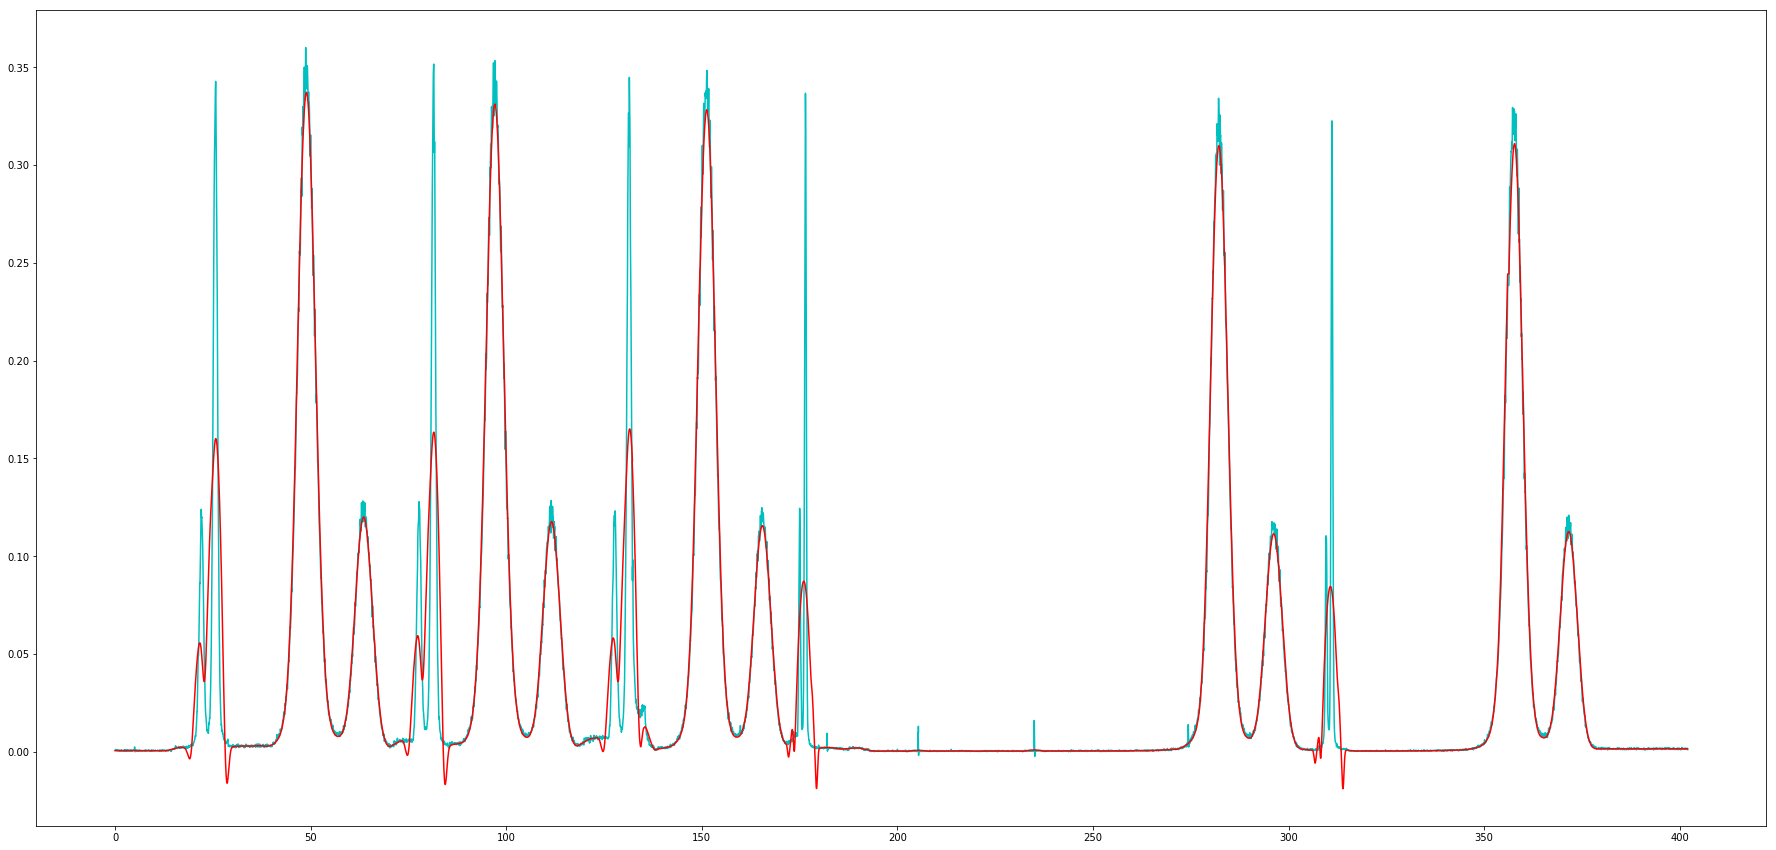

In [29]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df.ds, df.nA, 'c')
plt.plot(df.ds, yhat, 'r')
plt.show()

First Measurement

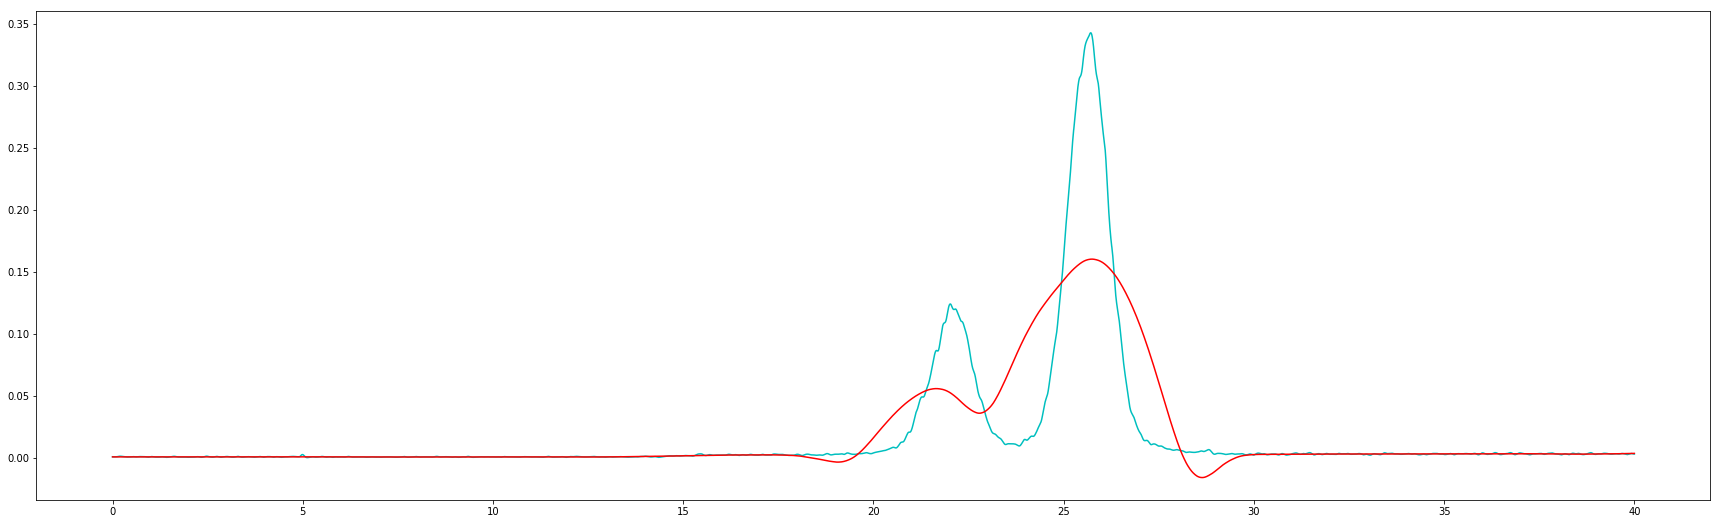

In [30]:
plt.figure(figsize=(30,9))
plt.plot(dfx.ds, dfx.nA, 'c')
plt.plot(dfx.ds, dfx.yhat, 'r')
plt.show()

Find indexes where there is a peak using peakutil package

In [31]:
indexes = peakutils.indexes(yhat, thres=0.25, min_dist=10000)
xmax = [df.ds[i] for i in indexes]

In [32]:
print(indexes)

[ 127874  242991  315638  404823  482374  554009  653311  751402  821780
  874305 1400989 1470540 1542522 1773531 1842226]


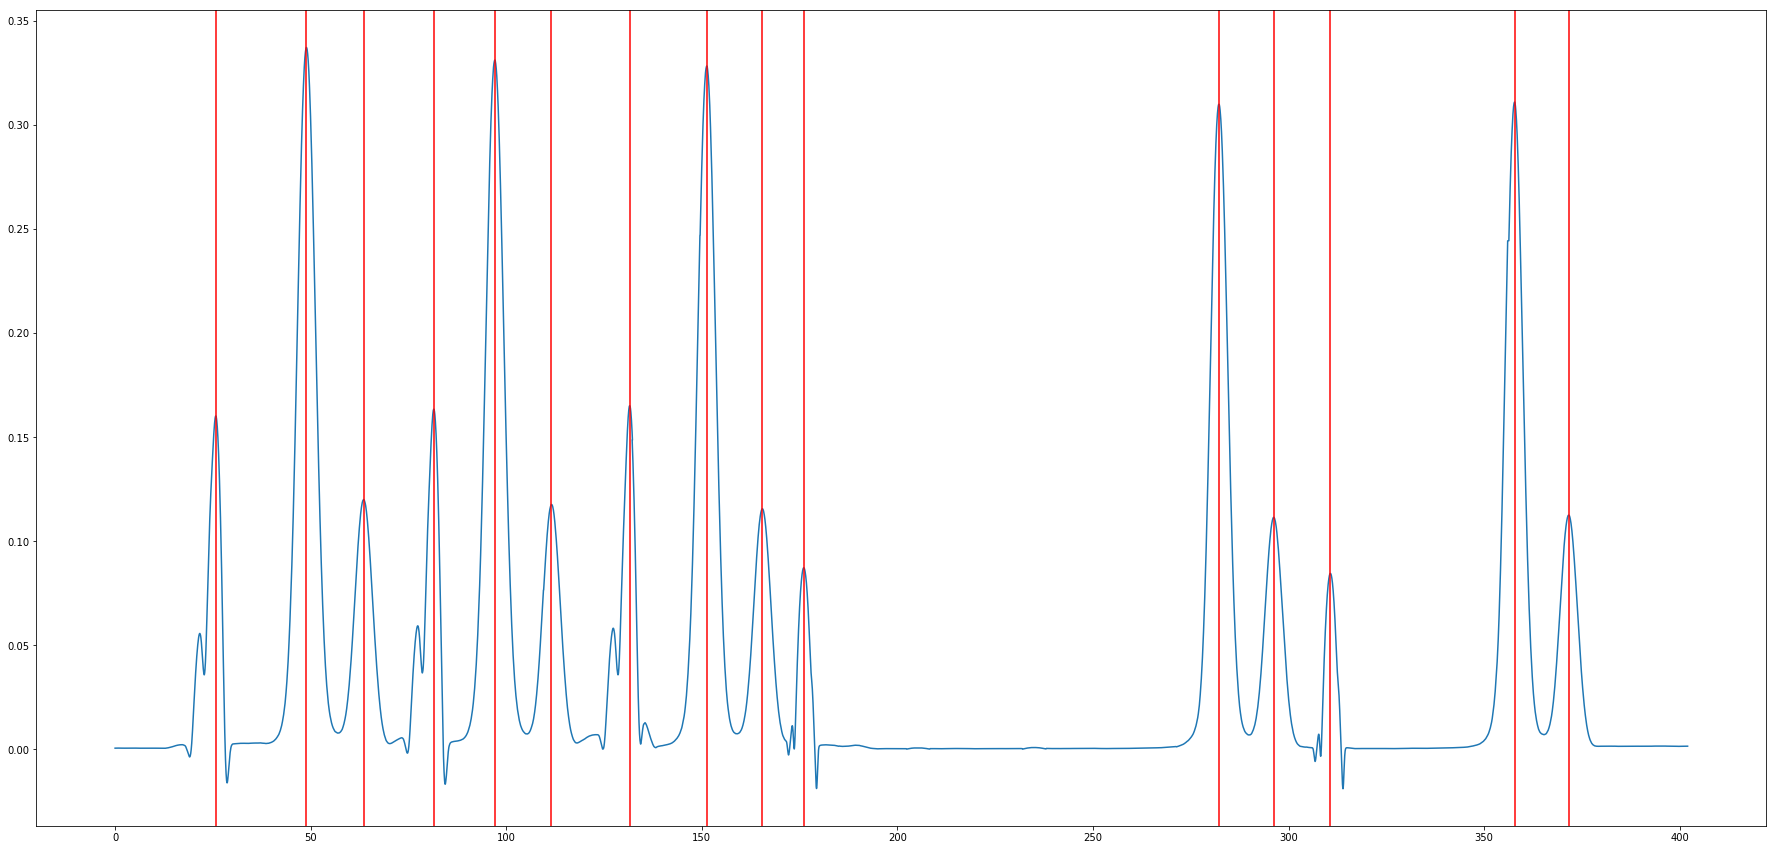

In [33]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
for xc in xmax:
    plt.axvline(x=xc, color = 'r')
plt.show()

Peak detector finds correct peaks at :0,1,4,5,8,9

In [40]:
ind = 1, 2, 4, 5, 7, 8, 10, 11, 13, 14

In [41]:
xmax_2 = [xmax[i] for i in ind]

Validation of correct peaks

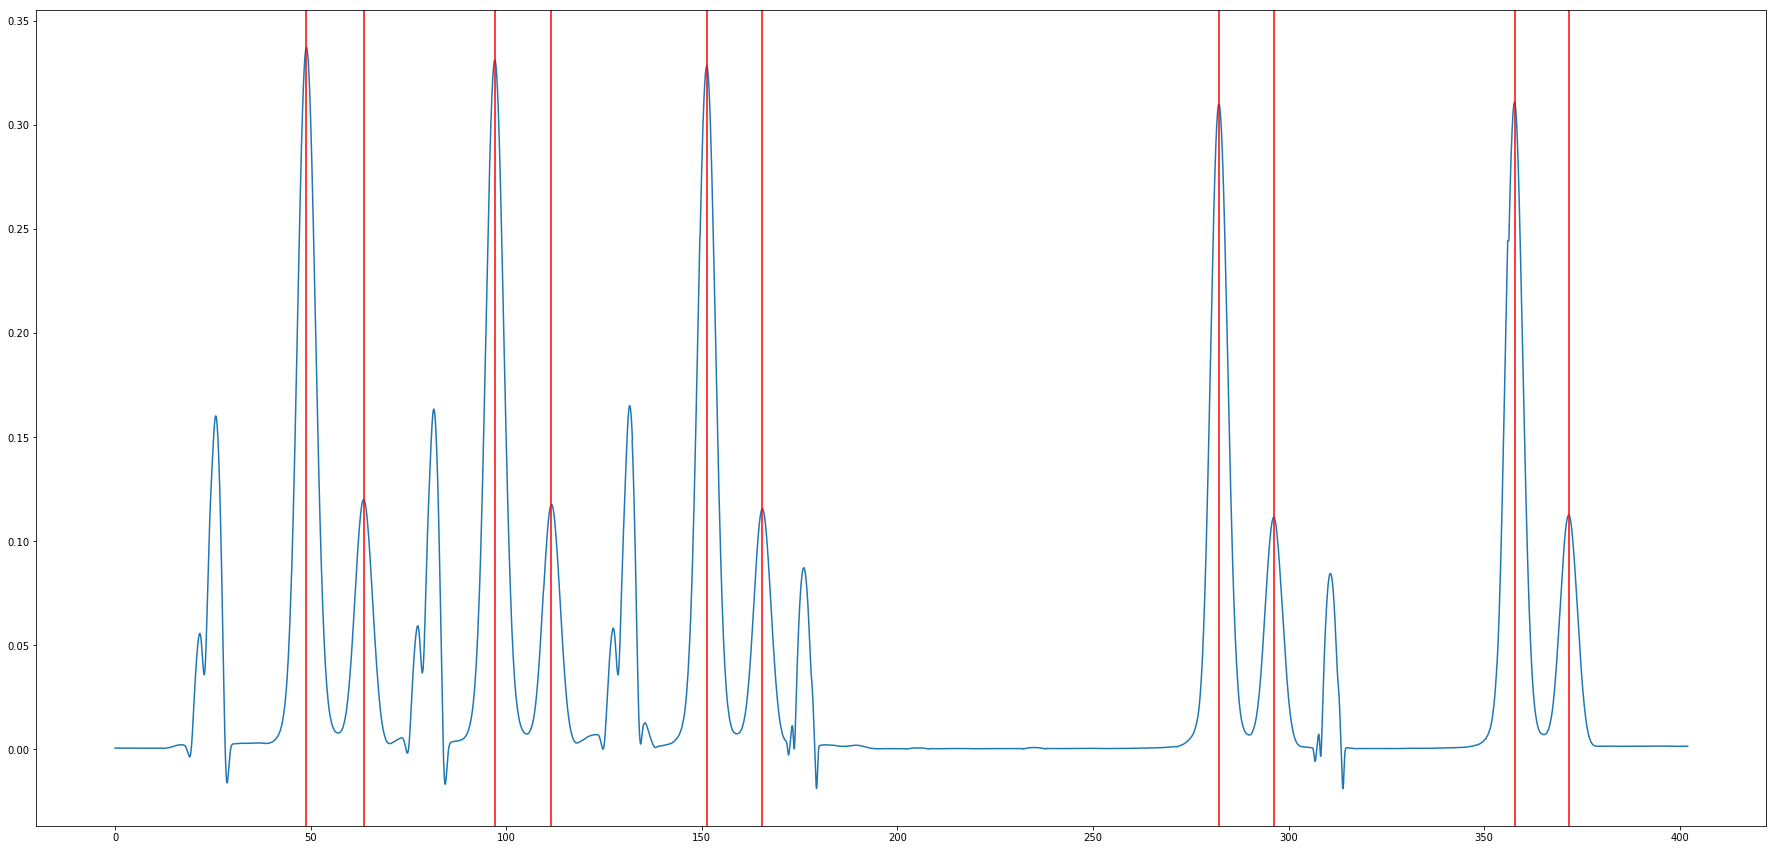

In [42]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
xcoords = [0.22058956, 0.33088437, 2.20589566]
for xc in xmax_2:
    plt.axvline(x=xc, color = 'r')
plt.show()

In [43]:
xmax = [indexes[i] for i in ind]
dfpeaks = df.iloc[xmax].reset_index(drop = True)

In [44]:
dfpeaks

,ds,nA,yhat
0,48.914168,0.347782,0.337246
1,63.538264,0.124365,0.120060
2,97.102392,0.353538,0.331204
3,111.571136,0.123049,0.117709
4,151.279216,0.346639,0.328350
5,165.494552,0.118792,0.115637
6,282.209016,0.326740,0.309973
7,296.210224,0.115577,0.111527
8,357.800272,0.324126,0.311038
9,371.627576,0.120878,0.112561


Calculating isotope shifts

In [45]:
diff = []
for i in range(1,int(len(dfpeaks)/2) + 1):
    d = (dfpeaks.ds[i*2-1] - dfpeaks.ds[i*2-2])/12
    diff.append(d)
    

In [63]:
diff

[1.218674666666665,
 1.205728666666668,
 1.1846113333333317,
 1.1667673333333302,
 1.152275333333326]

In [57]:
print(diff)
avg = sum(diff)/len(diff)
print(avg)

[1.218674666666665, 1.205728666666668, 1.1846113333333317, 1.1667673333333302, 1.152275333333326]
1.1856114666666642


In [58]:
import statistics
uc = statistics.stdev(diff)

In [71]:
IsotopeShift = (avg, "+/-", stdError)
print(IsotopeShift)

(1.1856114666666642, '+/-', 0.01217636305196922)


In [70]:
from math import sqrt
stdError = uc/sqrt(5)
print(stdError)

0.01217636305196922


In [ ]:
# keep 3 sig figs for measurements